In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px
import numpy as np
import geopandas as gpd


In [78]:
df = pd.read_csv('../data/collisions_routieres.csv')
mapbox_token = "pk.eyJ1IjoidG91amVyMDAiLCJhIjoiY2wwbWt6M3ptMTdhdTNibjU0OGFyMzc3ZiJ9.PYFp4yto8WHEODgZpWbDVQ"
px.set_mapbox_access_token(mapbox_token)
df["DT_ACCDN"] = pd.to_datetime(df["DT_ACCDN"])
df["year"] = df["DT_ACCDN"].dt.year
df["month"] = df["DT_ACCDN"].dt.month
df["day"] = df["DT_ACCDN"].dt.day
df["weekday"] = df["DT_ACCDN"].dt.weekday
df["GRAVE_MORT"] = df["NB_BLESSES_GRAVES"] + df["NB_MORTS"]
df["NB_BLESSE_VEHICULE"] = df['NB_VICTIMES_TOTAL'] \
                    -  df['NB_VICTIMES_PIETON'] \
                    - df['NB_VICTIMES_VELO']
df["NB_BLESSE_VELO_PIETON"] = df['NB_VICTIMES_TOTAL'] \
                    -  df['NB_BLESSE_VEHICULE'] \

df["TYPE"] = df["nb_camionLourd_tractRoutier"].apply(lambda x : "Autre" if x == 0 else "CAMION")

# Victime par années tout véhicule compris

In [79]:
pivotYearVictime = pd.pivot_table(df, values=['NB_VICTIMES_TOTAL', 'GRAVE_MORT'], index=['year'], aggfunc = 'sum')
normValue = pivotYearVictime.loc[2016, :]
normPivotYearVictime = pivotYearVictime / normValue -1
victimeOverTime = normPivotYearVictime.reset_index().melt(id_vars='year')


In [80]:
victimeOverTime.head()

,year,variable,value
0,2012,GRAVE_MORT,0.286364
1,2013,GRAVE_MORT,0.240909
2,2014,GRAVE_MORT,0.177273
3,2015,GRAVE_MORT,0.195455
4,2016,GRAVE_MORT,0.000000


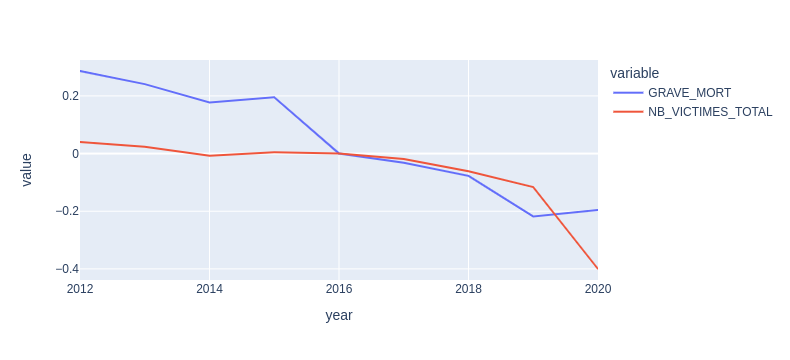

In [81]:
px.line(victimeOverTime, x='year', y='value', color='variable')

## Par véhicule

In [100]:
pivotYearVictimeType = pd.pivot_table(df, values=['NB_VICTIMES_TOTAL', 'GRAVE_MORT'], index=['TYPE', 'year'], aggfunc = 'sum')
normAutre = pivotYearVictimeType.loc[('Autre', 2016)]
normCamion = pivotYearVictimeType.loc[('CAMION', 2016)]
normPivotYearVictimeType = pivotYearVictimeType.copy()
normPivotYearVictimeType.loc['Autre']  = normPivotYearVictimeType.loc['Autre'].values/normAutre.values -1
normPivotYearVictimeType.loc['CAMION']  = normPivotYearVictimeType.loc['CAMION'].values/normCamion.values -1
victimeOverTimeType = normPivotYearVictimeType.reset_index().melt(id_vars=['year', 'TYPE'])


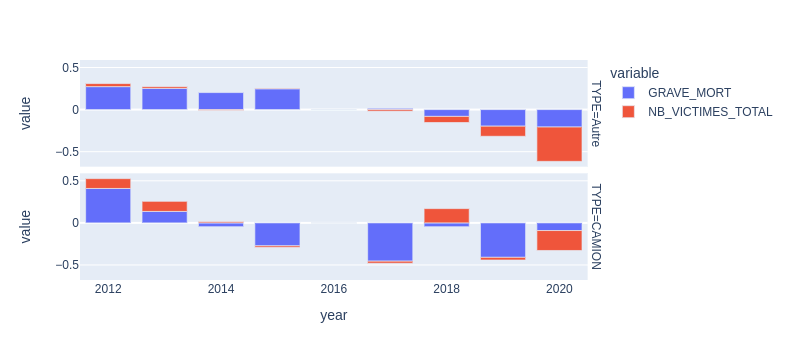

In [103]:
px.bar(victimeOverTimeType, x='year', y='value', color='variable', facet_row='TYPE')

In [102]:
victimeOverTimeType

,year,TYPE,variable,value
0,2012,Autre,GRAVE_MORT,0.272727
1,2013,Autre,GRAVE_MORT,0.252525
2,2014,Autre,GRAVE_MORT,0.202020
3,2015,Autre,GRAVE_MORT,0.247475
4,2016,Autre,GRAVE_MORT,0.000000
5,2017,Autre,GRAVE_MORT,0.015152
6,2018,Autre,GRAVE_MORT,-0.080808
7,2019,Autre,GRAVE_MORT,-0.196970
8,2020,Autre,GRAVE_MORT,-0.207071
9,2012,CAMION,GRAVE_MORT,0.409091
